In [29]:
import pandas as pd
import numpy as np

In [30]:
# Load the final dataset and test dataset from Parquet files
final_df = pd.read_parquet("../final_dataset.csv", engine="pyarrow")
test_df = pd.read_parquet("../final_test.csv", engine="pyarrow")

print("Datasets loaded.")

Datasets loaded.


In [31]:
# Display heads of both datasets
print("Head of final_df:")
display(final_df.head())

print("Head of test_df:")
display(test_df.head())

Head of final_df:


,card_id,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,feature_1,feature_2,feature_3,target
0,C_ID_7cfb53771e,0,-1,1,1,1,755,5999,-6,-0.716855,...,1.045006,12.0,-1,69.0,9.0,1.0,2.0,1.0,0.0,2.384050
1,C_ID_8f6e73a2a9,1,344,0,0,0,387,10961,-8,-0.731881,...,1.045006,12.0,-1,69.0,9.0,1.0,3.0,2.0,1.0,-1.131020
2,C_ID_f29a005fba,1,-1,1,1,1,839,20064,-1,-0.722745,...,1.045006,12.0,-1,69.0,9.0,1.0,1.0,1.0,0.0,0.499893
3,C_ID_9b1f626be5,0,69,0,1,1,792,9022,-6,-0.296112,...,1.045006,12.0,-1,69.0,9.0,1.0,2.0,1.0,0.0,1.148530
4,C_ID_c32ea06010,1,183,0,1,1,307,19574,-4,-0.701828,...,1.045006,12.0,-1,69.0,9.0,1.0,4.0,1.0,0.0,-0.400508


Head of test_df:


,card_id,feature_1,feature_2,feature_3,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,C_ID_a8c9d4d2b1,2,1,0,1,-1,1,4,2,879,...,1.03,1.040545,6.0,1.05,1.058338,12.0,-1,82.0,9.0,1.0
1,C_ID_5cc67e30b7,4,2,0,1,19,0,1,1,68,...,1.03,1.040545,6.0,1.05,1.058338,12.0,-1,82.0,9.0,1.0
2,C_ID_5cc67e30b7,4,2,0,1,19,0,1,1,683,...,1.03,1.040545,6.0,1.05,1.058338,12.0,-1,82.0,9.0,1.0
3,C_ID_5cc67e30b7,4,2,0,1,19,0,1,1,108,...,1.03,1.040545,6.0,1.05,1.058338,12.0,-1,82.0,9.0,1.0
4,C_ID_9aa9b08732,2,1,0,1,344,0,-1,-1,34,...,1.03,1.040545,6.0,1.05,1.058338,12.0,-1,82.0,9.0,1.0


In [32]:
# Print all columns in final_df and test_df

print("Columns in final_df:")
print(final_df.columns.tolist())

print("\nColumns in test_df:")
print(test_df.columns.tolist())

Columns in final_df:
['card_id', 'authorized_flag', 'city_id_x', 'category_1_x', 'installments', 'category_3', 'merchant_category_id_x', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2_x', 'state_id_x', 'subsector_id_x', 'merchant_group_id', 'merchant_category_id_y', 'subsector_id_y', 'numerical_1', 'numerical_2', 'category_1_y', 'most_recent_sales_range', 'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id_y', 'state_id_y', 'category_2_y', 'feature_1', 'feature_2', 'feature_3', 'target']

Columns in test_df:
['card_id', 'feature_1', 'feature_2', 'feature_3', 'authorized_flag', 'city_id_x', 'category_1_x', 'installments', 'category_3', 'merchant_category_id_x', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2_x', 'state_id_x', 'subsector_id_x',

In [33]:
# Reset index to ensure "card_id" is a column, not the index
final_df = final_df.reset_index()

# Define the desired column order based on the expected columns (target is the extra column in final_df)
col_order = ['card_id', 'authorized_flag', 'city_id_x', 'category_1_x', 'installments', 'category_3',
             'merchant_category_id_x', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date',
             'category_2_x', 'state_id_x', 'subsector_id_x', 'merchant_group_id', 'merchant_category_id_y',
             'subsector_id_y', 'numerical_1', 'numerical_2', 'category_1_y', 'most_recent_sales_range',
             'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
             'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 
             'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id_y', 'state_id_y', 
             'category_2_y', 'feature_1', 'feature_2', 'feature_3', 'target']

# Reorder final_df columns according to col_order
final_df = final_df[col_order]

# Print columns of final_df for verification
print("Final_df columns:")
print(final_df.columns.tolist())

Final_df columns:
['card_id', 'authorized_flag', 'city_id_x', 'category_1_x', 'installments', 'category_3', 'merchant_category_id_x', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2_x', 'state_id_x', 'subsector_id_x', 'merchant_group_id', 'merchant_category_id_y', 'subsector_id_y', 'numerical_1', 'numerical_2', 'category_1_y', 'most_recent_sales_range', 'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id_y', 'state_id_y', 'category_2_y', 'feature_1', 'feature_2', 'feature_3', 'target']


In [34]:
# Remove 'target' from the column order for test_df since test_df doesn't have it
test_col_order = [col for col in col_order if col != 'target']

# Reorder test_df columns to follow test_col_order
test_df = test_df[test_col_order]

# Print columns of test_df for verification
print("Test_df columns:")
print(test_df.columns.tolist())

Test_df columns:
['card_id', 'authorized_flag', 'city_id_x', 'category_1_x', 'installments', 'category_3', 'merchant_category_id_x', 'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date', 'category_2_x', 'state_id_x', 'subsector_id_x', 'merchant_group_id', 'merchant_category_id_y', 'subsector_id_y', 'numerical_1', 'numerical_2', 'category_1_y', 'most_recent_sales_range', 'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12', 'category_4', 'city_id_y', 'state_id_y', 'category_2_y', 'feature_1', 'feature_2', 'feature_3']


In [35]:
# Count unique card_ids in each dataframe
unique_final = final_df['card_id'].nunique()
unique_test = test_df['card_id'].nunique()

print(f"Number of unique card_id in final_df: {unique_final}")
print(f"Number of unique card_id in test_df: {unique_test}")

Number of unique card_id in final_df: 8801
Number of unique card_id in test_df: 5363


In [36]:
# Get the sets of card_ids from both dataframes
final_card_ids = set(final_df['card_id'])
test_card_ids = set(test_df['card_id'])

# Find common card_ids
common_card_ids = final_card_ids.intersection(test_card_ids)

print(f"Number of common card_id between final_df and test_df: {len(common_card_ids)}")
# Optionally, display a sample of common card_ids
print("Sample common card_id values:")
print(list(common_card_ids)[:10])

Number of common card_id between final_df and test_df: 0
Sample common card_id values:
[]


In [37]:
final_df.head(100)

,card_id,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y,feature_1,feature_2,feature_3,target
0,C_ID_7cfb53771e,0,-1,1,1,1,755,5999,-6,-0.716855,...,1.045006,12.0,-1,69.0,9.0,1.0,2.0,1.0,0.0,2.384050
1,C_ID_8f6e73a2a9,1,344,0,0,0,387,10961,-8,-0.731881,...,1.045006,12.0,-1,69.0,9.0,1.0,3.0,2.0,1.0,-1.131020
2,C_ID_f29a005fba,1,-1,1,1,1,839,20064,-1,-0.722745,...,1.045006,12.0,-1,69.0,9.0,1.0,1.0,1.0,0.0,0.499893
3,C_ID_9b1f626be5,0,69,0,1,1,792,9022,-6,-0.296112,...,1.045006,12.0,-1,69.0,9.0,1.0,2.0,1.0,0.0,1.148530
4,C_ID_c32ea06010,1,183,0,1,1,307,19574,-4,-0.701828,...,1.045006,12.0,-1,69.0,9.0,1.0,4.0,1.0,0.0,-0.400508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C_ID_0cd2ce025c,1,200,0,0,0,705,3861,-9,-0.724368,...,1.045006,12.0,-1,69.0,9.0,1.0,5.0,2.0,1.0,0.109291
96,C_ID_fd56dc9b1c,1,212,0,0,0,367,12448,-10,-0.638341,...,1.045006,12.0,-1,69.0,9.0,1.0,2.0,2.0,0.0,1.769061
97,C_ID_79a80f833c,1,25,0,0,0,278,3456,0,-0.700491,...,1.045006,12.0,-1,69.0,9.0,1.0,5.0,2.0,1.0,-0.453395
98,C_ID_588e401636,1,44,0,0,0,278,523,-1,-0.716103,...,1.045006,12.0,-1,69.0,9.0,1.0,5.0,2.0,1.0,-1.488454


## Korelasi Heatmap Sample

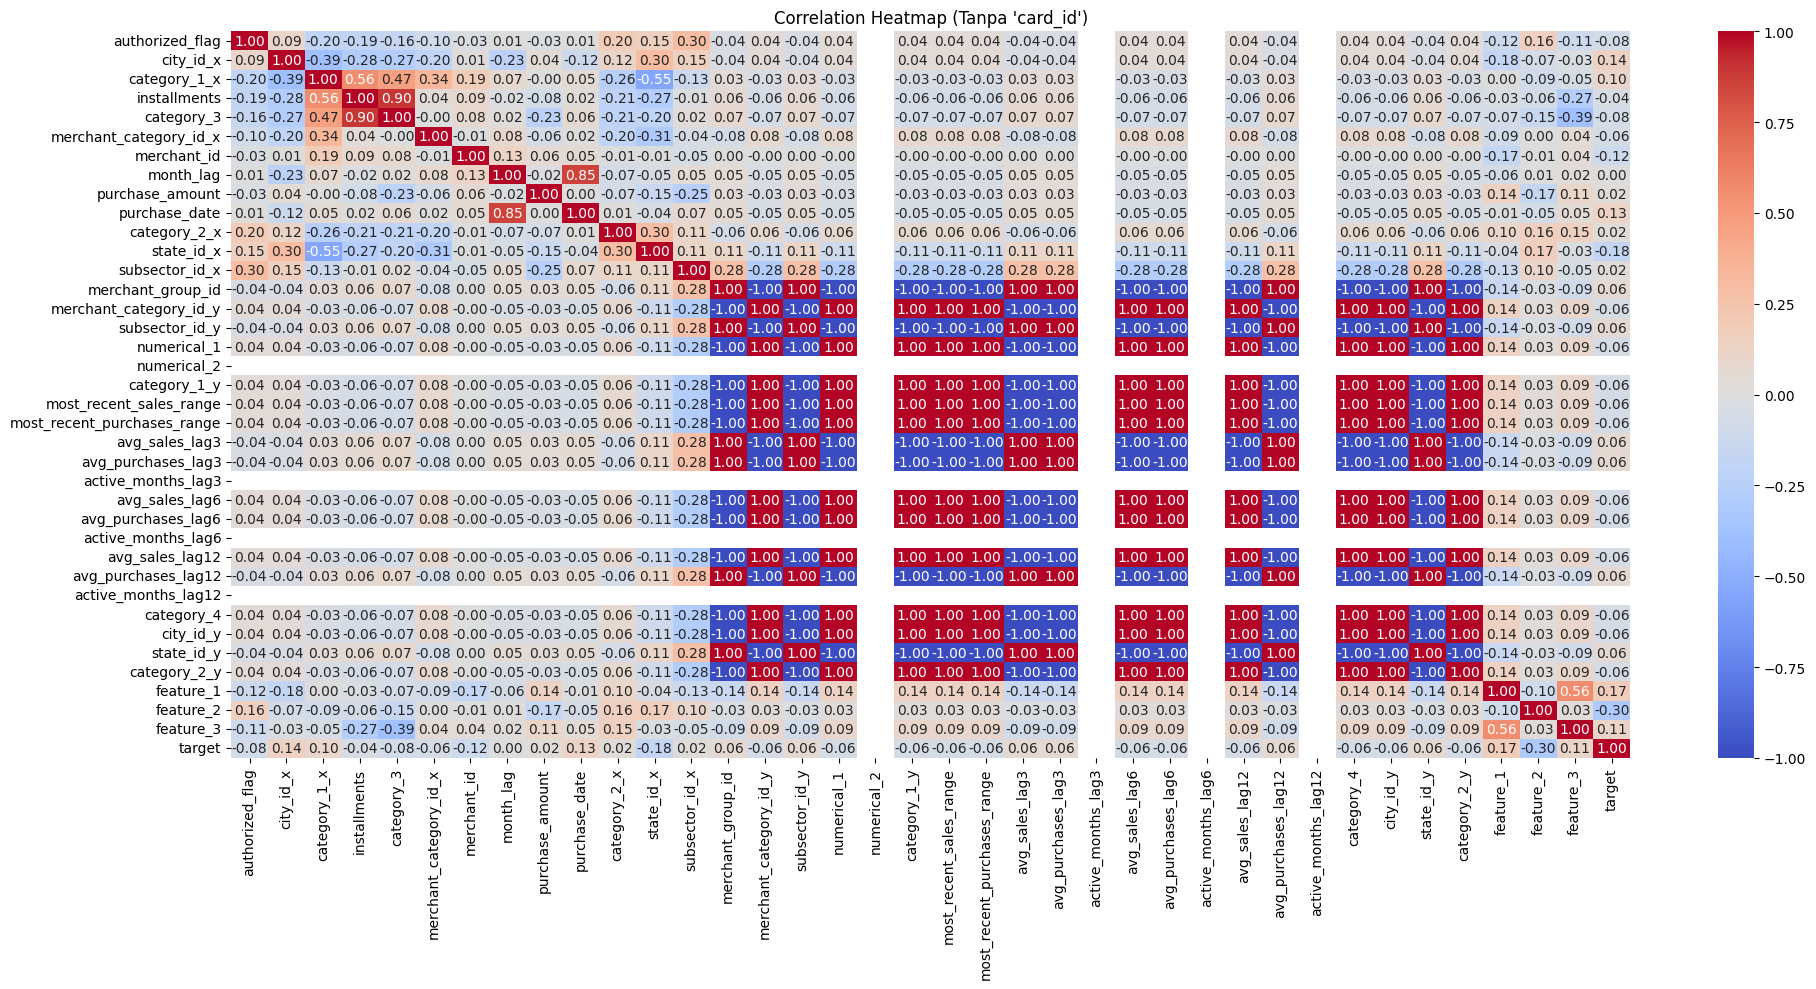

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

final_df_sample = final_df.head(100).copy()

final_df_sample = final_df_sample.drop(columns=['card_id'])

for kolom in final_df_sample.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    final_df_sample[kolom] = encoder.fit_transform(final_df_sample[kolom])

scaler = MinMaxScaler()
final_df_scaled = pd.DataFrame(scaler.fit_transform(final_df_sample), columns=final_df_sample.columns)

plt.figure(figsize=(20, 10))
sns.heatmap(final_df_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Tanpa 'card_id')")
plt.tight_layout()
plt.show()


## Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

for kolom in final_df.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    final_df[kolom] = encoder.fit_transform(final_df[kolom])
    test_df[kolom] = encoder.transform(test_df[kolom])

final_df['feature_1_2'] = final_df['feature_1'] * final_df['feature_2']
final_df['feature_2_3'] = final_df['feature_2'] * final_df['feature_3']
final_df['installments_log'] = final_df['installments'].apply(lambda x: 0 if x <= 0 else np.log1p(x))

test_df['feature_1_2'] = test_df['feature_1'] * test_df['feature_2']
test_df['feature_2_3'] = test_df['feature_2'] * test_df['feature_3']
test_df['installments_log'] = test_df['installments'].apply(lambda x: 0 if x <= 0 else np.log1p(x))

print(final_df.shape)
final_df.head()


(48095, 42)


,card_id,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,...,city_id_y,state_id_y,category_2_y,feature_1,feature_2,feature_3,target,feature_1_2,feature_2_3,installments_log
0,C_ID_7cfb53771e,0,-1,1,1,1,755,5999,-6,-0.716855,...,69.0,9.0,1.0,2.0,1.0,0.0,2.384050,2.0,0.0,0.693147
1,C_ID_8f6e73a2a9,1,344,0,0,0,387,10961,-8,-0.731881,...,69.0,9.0,1.0,3.0,2.0,1.0,-1.131020,6.0,2.0,0.000000
2,C_ID_f29a005fba,1,-1,1,1,1,839,20064,-1,-0.722745,...,69.0,9.0,1.0,1.0,1.0,0.0,0.499893,1.0,0.0,0.693147
3,C_ID_9b1f626be5,0,69,0,1,1,792,9022,-6,-0.296112,...,69.0,9.0,1.0,2.0,1.0,0.0,1.148530,2.0,0.0,0.693147
4,C_ID_c32ea06010,1,183,0,1,1,307,19574,-4,-0.701828,...,69.0,9.0,1.0,4.0,1.0,0.0,-0.400508,4.0,0.0,0.693147


In [43]:
final_df.to_csv("../final_dataset_feature_engineering.csv", index=False)
test_df.to_csv("../test_feature_engineering.csv", index=False)